# SimplePerceptron

In [1]:
# coding=utf8
import numpy as np

## Loading Data

In [2]:
# separatable point
import pandas as pd
p1 = pd.read_csv("point1.csv")
p2 = pd.read_csv("point2.csv")

## Preprocessing

In [3]:
# convert vector to extend vector
P1,P2 = p1.copy(),p2.copy()
P1['b'] = np.array([1] * len(P1.index))
P2['b'] = np.array([1] * len(P2.index))
P2 *= -1

In [4]:
point = np.r_[np.array(P1),np.array(P2)]

In [5]:
point

array([[ 0,  1,  1],
       [ 1,  2,  1],
       [-2, -1, -1],
       [-2,  0, -1]])

## Learning

In [14]:
class SimplePerceptron:
    def __init__(self, W=np.round(np.random.rand(3)*10 / 2), step=1, epochs=10):
        self.W = W
        self.step = step
        self.epochs = epochs
        print("Initial Weight => {}".format(self.W))
        
    def predict(self, point):
        return np.where(np.dot(point,self.W.T)<=0)[0]
        
    def train(self, point):
        for i in range(self.epochs):
            if len(self.predict(point)) == 0:
                break
            print("epoch {}" .format(i+1))
            self.w_ = self.W
            self.w_ += point[self.predict(point)[0]] * self.step
            print("W{} => {}" .format(i+1, self.w_))
        return self.w_

In [15]:
a = SimplePerceptron(step=0.5)

Initial Weight => [ 4.  1.  3.]


In [16]:
ans = a.train(point)

epoch 1
W1 => [ 3.   0.5  2.5]
epoch 2
W2 => [ 2.  0.  2.]
epoch 3
W3 => [ 1.  -0.5  1.5]
epoch 4
W4 => [ 0. -1.  1.]
epoch 5
W5 => [ 0.  -0.5  1.5]
epoch 6
W6 => [-1. -1.  1.]
epoch 7
W7 => [-1.  -0.5  1.5]
epoch 8
W8 => [-0.5  0.5  2. ]
epoch 9
W9 => [-1.5  0.   1.5]
epoch 10
W10 => [-1.  1.  2.]


## Visualization

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
x1, x2 = np.array(p1.T.copy()), np.array(p2.T.copy())

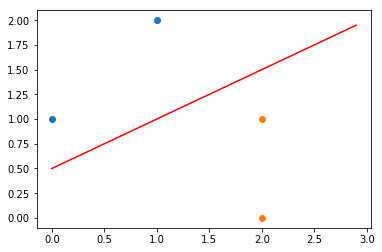

In [11]:
x = np.arange(0,3,0.1)
y = (ans[0] * x + ans[2]) / (-ans[1])
plt.plot(x,y,"r-")
plt.plot(x1[0], x1[1],"o")
plt.plot(x2[0], x2[1], "o")